<a href="https://colab.research.google.com/github/swatipc/DeepLearning/blob/master/UngradedAssignment1_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(test_labels)

[7 2 1 ... 4 5 6]


In [0]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

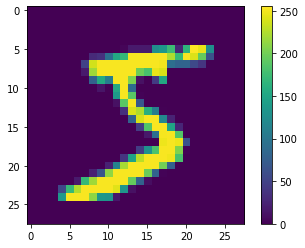

In [0]:
#Preprocess data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#scaling values from 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

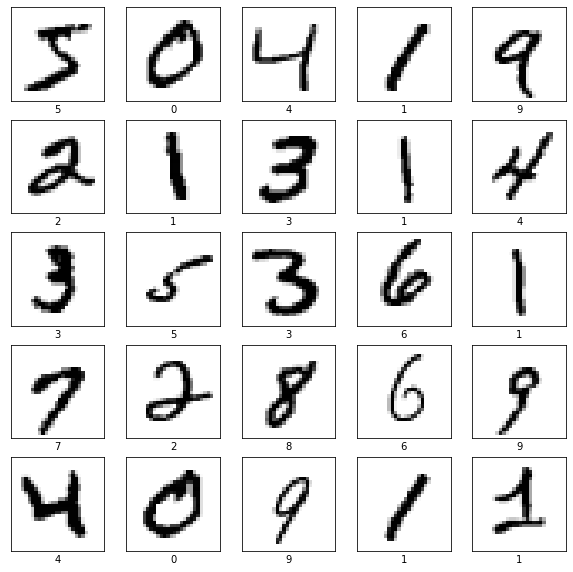

In [0]:
#Verifying format of data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Setting up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
#Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
#Train the model
#Feeding data to model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2538 - acc: 0.9287
Epoch 2/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1110 - acc: 0.9668
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0765 - acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0583 - acc: 0.9823
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0443 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0357 - acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0284 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0228 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0186 - acc: 0.9944
Epoch 10/10
60000/60000 [==============================] - 

In [0]:
#Checking accuracy on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.0868 - acc: 0.9790

Test accuracy: 0.979


In [0]:
#Checking accuracy on train data
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTrain accuracy:', train_acc)

60000/60000 - 2s - loss: 0.0154 - acc: 0.9951

Train accuracy: 0.99511665


Overfitting is 0.2

In [0]:
#Making predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [0]:
#Checking first prediction made by model
predictions[0]

array([8.0567761e-11, 2.2751538e-12, 5.7251039e-09, 1.3370141e-05,
       3.1122555e-14, 5.5637186e-11, 4.8491959e-16, 9.9998653e-01,
       7.7903928e-10, 1.2650014e-07], dtype=float32)

In [0]:
#Checking which label has highest confidence value (prediction)
np.argmax(predictions[0])

7

In [0]:
#Examining the test label
test_labels[0]

7

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

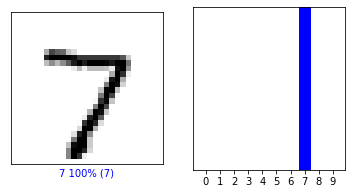

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

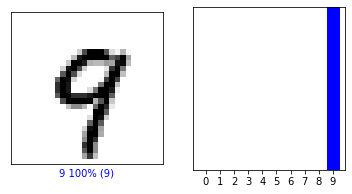

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

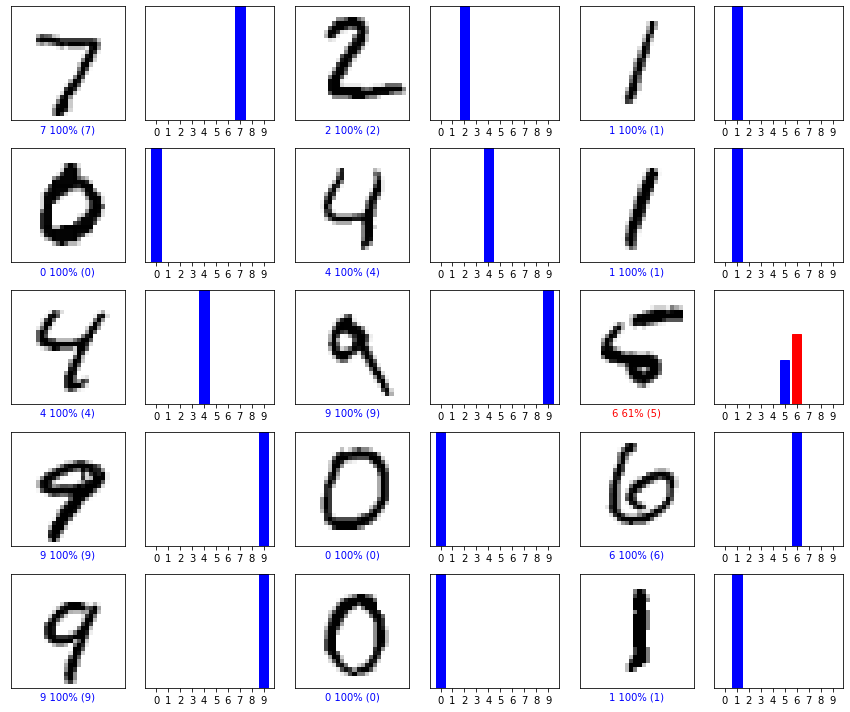

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
#Use trained model
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.0369132e-11 7.8332289e-07 9.9999917e-01 3.8696610e-09 1.1245018e-21
  6.2144056e-13 2.5351909e-10 4.1027298e-19 3.8356966e-09 2.3447305e-18]]


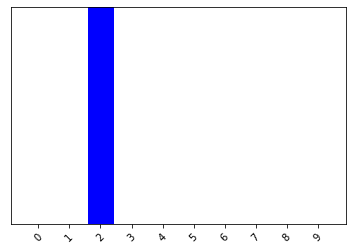

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2